In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print(train_data['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object


### Preprocessing
Fill missing values 

Convert categorical data into numerical

Handle outliers

In [4]:
#Fill missing values of age with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

#Fill missing values Embarked with the most frequent value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

#Convert categorical to numerical
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

C:\Users\Seanuel\AppData\Local\Temp\ipykernel_19932\2456080437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\Seanuel\AppData\Local\Temp\ipykernel_19932\2456080437.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

### Family Data

In [5]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']        #spouses and siblings + parents and children

train_data['IsAlone'] = 1 # Make Is Alone column (Alone=1)
train_data['IsAlone'].loc[train_data['FamilySize'] >  0] = 0 # Update for non-lone passengers

C:\Users\Seanuel\AppData\Local\Temp\ipykernel_19932\173765980.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data['IsAlone'].loc[train_data['FamilySize'] >  0] = 0 # Update for non-lone passengers
C:\Users\Seanuel\AppData\Local\Te

## Decision Tree Model

In [6]:
X = train_data[['Pclass', 'Sex', 'Age', 'FamilySize']]
Y = train_data["Survived"]

#split into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#train model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, Y_train)

#make predictions
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8212


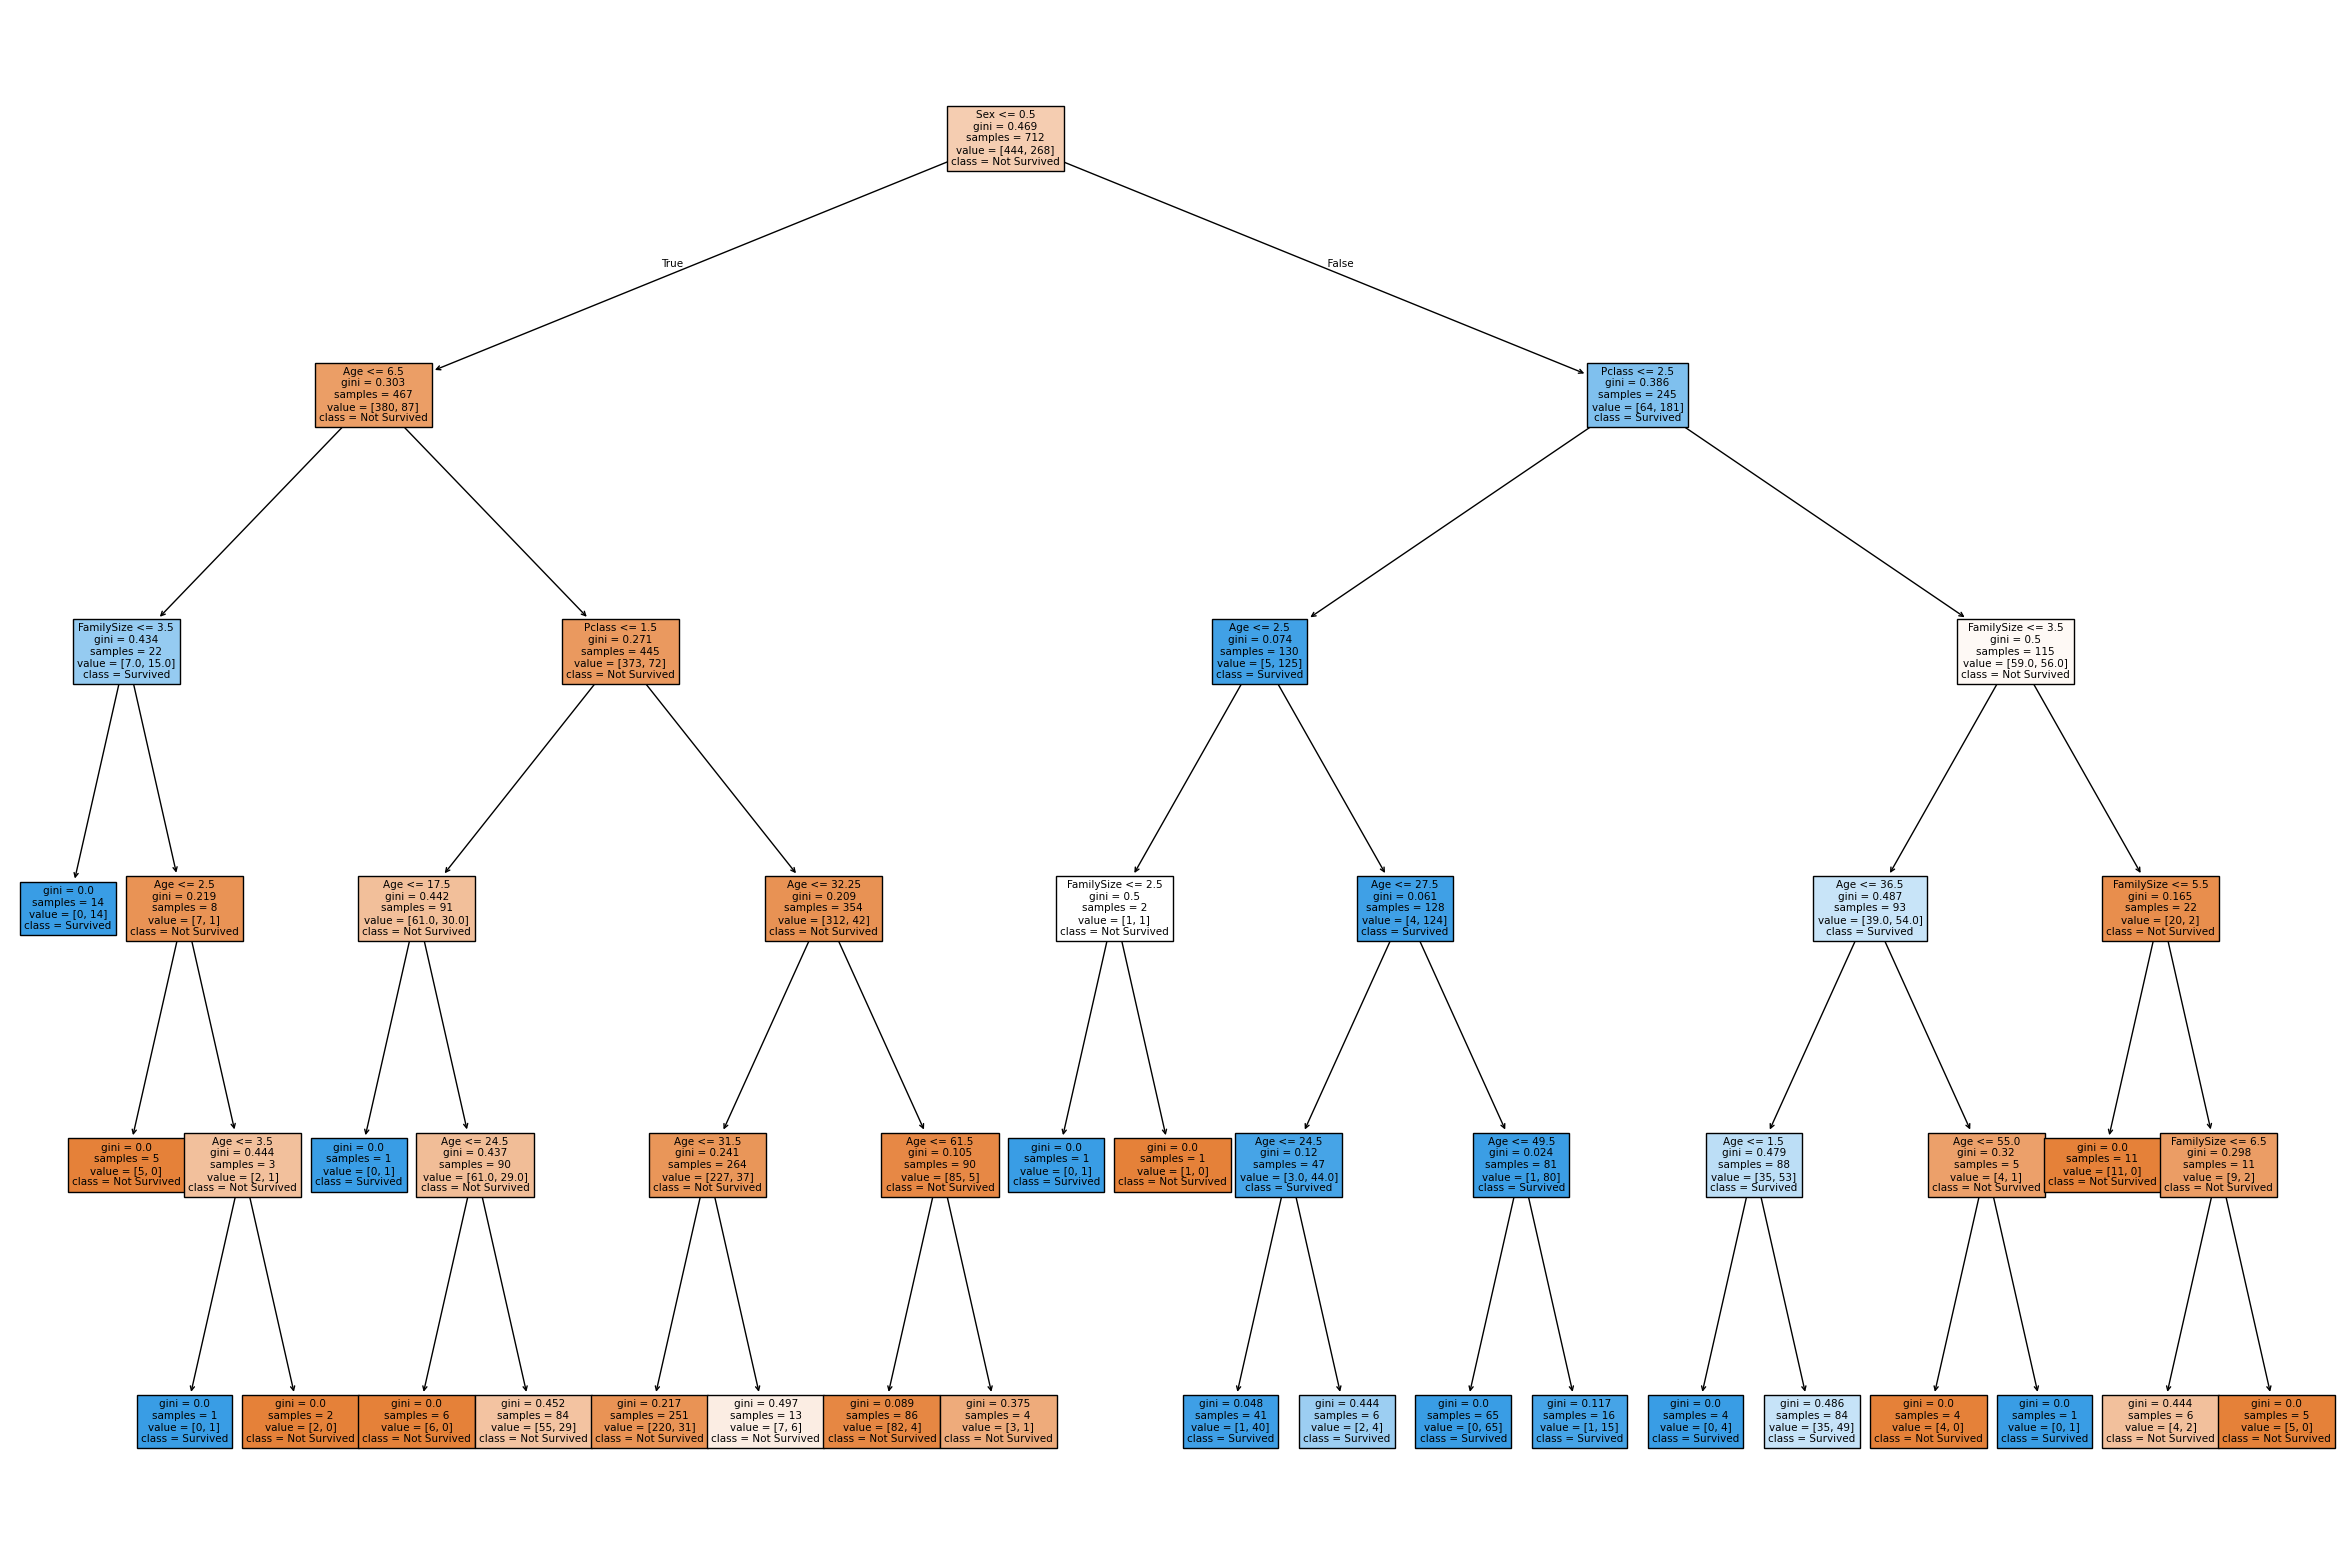

In [9]:
plt.figure(figsize=(30,20))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

## Test

### Preprocess test.csv

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [20]:
print(test_data['Sex'].isnull().sum())


0


In [21]:
# missing: age, fare
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

#Convert categorical to numerical
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})

#FamilySize
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']
test_data['IsAlone'] = 1
test_data['IsAlone'].loc[test_data['FamilySize'] > 0] = 0

C:\Users\Seanuel\AppData\Local\Temp\ipykernel_19932\626654613.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
C:\Users\Seanuel\AppData\Local\Temp\ipykernel_19932\626654613.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [23]:
X_pred = test_data[['Pclass', 'Sex', 'Age', 'FamilySize']]
prediction = model.predict(X_pred)

prediction_csv = pd.DataFrame({'PassengerId':test_data['PassengerId'], 'Survived':prediction})

prediction_csv.to_csv('prediction.csv', index=False)